# Part 1: Data Cleaning with Pandas

# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np

# Load the Dataset

In [3]:
df = pd.read_csv('movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Inspect the Data

In [4]:
# Display basic information about the DataFrame
df.info()

# Check for missing values in the DataFrame
df.isnull().sum()

# Display summary statistics of the DataFrame
df.describe()

# Display the first few rows of the DataFrame to understand its structure
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


# Handle Missing Values

In [5]:
df['RATING'].fillna(df['RATING'].median(), inplace=True)
df.dropna(subset=['MOVIES', 'GENRE'], inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

C:\Users\valra\AppData\Local\Temp\ipykernel_6716\3600976309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATING'].fillna(df['RATING'].median(), inplace=True)


MOVIES         0
YEAR         603
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES       1751
RunTime     2887
Gross       9459
dtype: int64

# Data Type Conversion

In [6]:
df['YEAR'] = pd.to_datetime(df['YEAR'], errors='coerce')
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9919 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   MOVIES    9919 non-null   object        
 1   YEAR      0 non-null      datetime64[ns]
 2   GENRE     9919 non-null   object        
 3   RATING    9919 non-null   float64       
 4   ONE-LINE  9919 non-null   object        
 5   STARS     9919 non-null   object        
 6   VOTES     8168 non-null   object        
 7   RunTime   7032 non-null   float64       
 8   Gross     460 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 774.9+ KB


C:\Users\valra\AppData\Local\Temp\ipykernel_6716\2681925268.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['YEAR'] = pd.to_datetime(df['YEAR'], errors='coerce')


# Remove Duplicates

In [7]:
df.drop_duplicates(inplace=True)

# Verify that duplicates
df.duplicated().sum()

0

# Feature Extraction
Extract meaningful features from the data, such as genres, ratings, and release years.

In [8]:
df['release_year'] = df['YEAR'].dt.year
genres = df['GENRE'].str.get_dummies(sep=', ')
df = pd.concat([df, genres], axis=1)
df.head()
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross', 'release_year',
       ...
       'Sci-Fi            ', 'Short', 'Short            ', 'Sport',
       'Sport            ', 'Talk-Show            ', 'Thriller',
       'Thriller            ', 'War            ', 'Western            '],
      dtype='object', length=108)

# Save Cleaned Dataset

In [9]:
df.to_csv('cleaned_movies.csv', index=False)
cleaned_df = pd.read_csv('cleaned_movies.csv')
cleaned_df.head()

C:\Users\valra\AppData\Local\Temp\ipykernel_6716\966149798.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv('cleaned_movies.csv')


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,release_year,...,Sci-Fi,Short,Short,Sport,Sport,Talk-Show,Thriller,Thriller,War,Western
0,Blood Red Sky,NaN,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,Masters of the Universe: Revelation,NaN,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,NaN,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,Rick and Morty,NaN,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Army of Thieves,NaN,"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis
Performing exploratory data analysis to identify trends or patterns in the data.

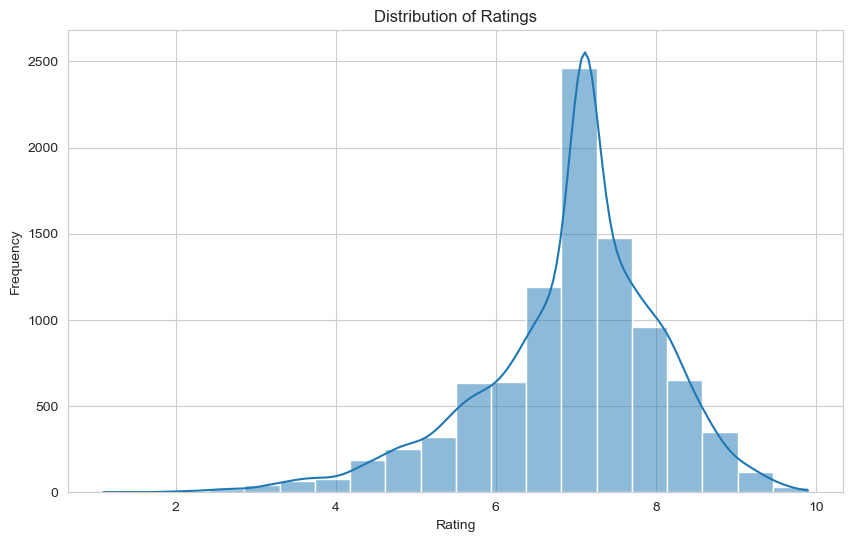

C:\Users\valra\AppData\Local\Temp\ipykernel_6716\2701757578.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


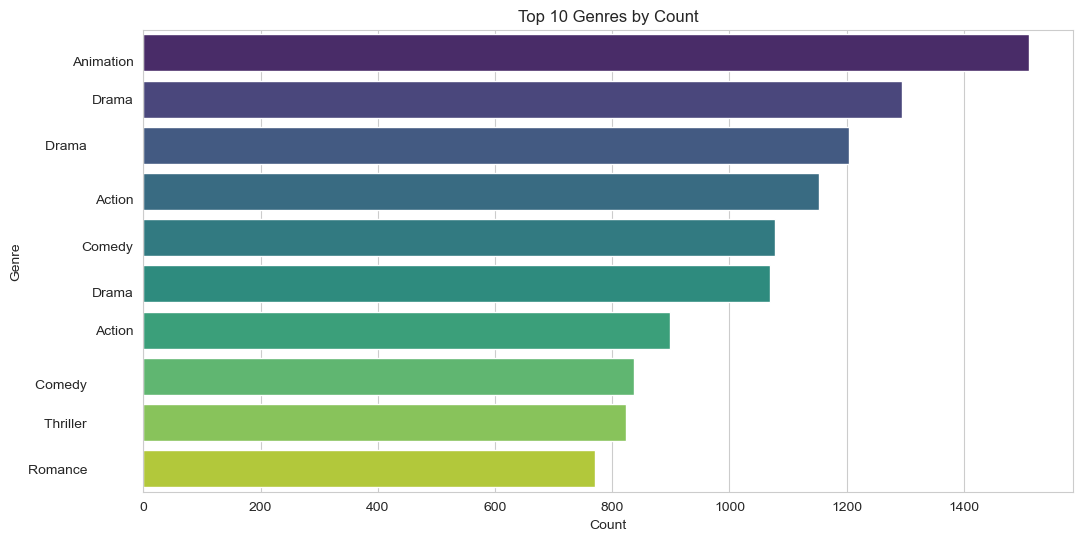

C:\Users\valra\AppData\Local\Temp\ipykernel_6716\2701757578.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_average_rating_by_genre.values, y=top_average_rating_by_genre.index, palette='coolwarm')


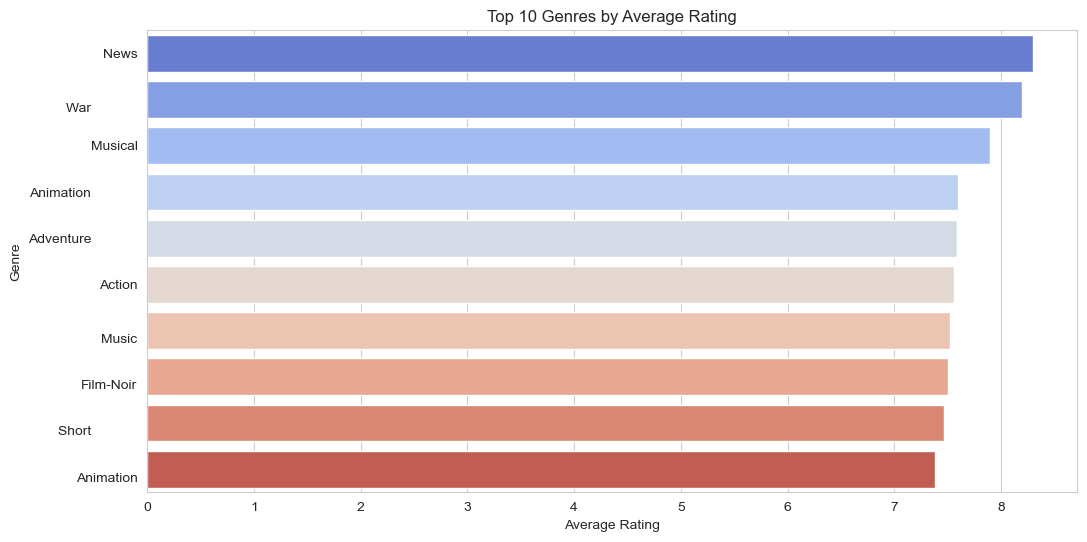

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Top 10 Genres by Count
top_genres = genres.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Average Rating by Genre
average_rating_by_genre = df[genres.columns].multiply(df['RATING'], axis=0).sum() / genres.sum()
top_average_rating_by_genre = average_rating_by_genre.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_average_rating_by_genre.values, y=top_average_rating_by_genre.index, palette='coolwarm')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# Summary of Cleaning Process

The cleaning process involved a number of steps to make the dataset ready for analysis. Below is a quick overview of what was taken and any challenges faced.

**Dataset Loading**: The dataset had been loaded from a csv file into a pandas Dataframe. Initial inspection in general showed missing values as well as incorrect data type.

**Handling Missing Values**: The missing values of the column 'rating' has been filled with the Median Rating. The rows missing the 'title' and 'genre' have been dropped as these fields were critical for analysis.

**Data Type Conversion**: The 'release_date' column is converted into datetime format and 'rating' into numeric. This process was essential to have all data properly represented for actual analysis and visualization.

**Removing Duplicates**: This was done to keep the integrity of the dataset by removing duplicate rows.

**Feature Engineering**: New features were created from existing columns. 'release_year' was extracted from 'release_date' and the 'genre' column was split into multiple columns, one for each genre.

**Saving the Cleaned Dataset**: The now cleaned dataset was then saved into a new CSV file for future use.


**Challenges Faced**: 

-Handling missing values in critical columns required careful consideration to avoid losing important data.

-Data type conversion, in particular dates, required error handling and standardization.

-Feature extraction from the 'genre' column was computationally expensive because it involved a lot of splitting and concatenation. Overall, the cleaning process improved the quality of the dataset, making it suitable for analysis and modeling.

# Part 2: Sentiment Analysis

# Importing Required Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob

# Loading Dataset

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocessing and cleaning Text Data

In [ ]:
# Function to clean and preprocess text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


# Classifying Sentiments

In [ ]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['cleaned_review'].apply(analyze_sentiment)
df.head()

# Summary
sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
sentiment_distribution

sentiment
positive    75.680
negative    24.264
neutral      0.056
Name: proportion, dtype: float64

# Visualizing Sentiment Distribution

sentiment
positive    75.680
negative    24.264
neutral      0.056
Name: proportion, dtype: float64


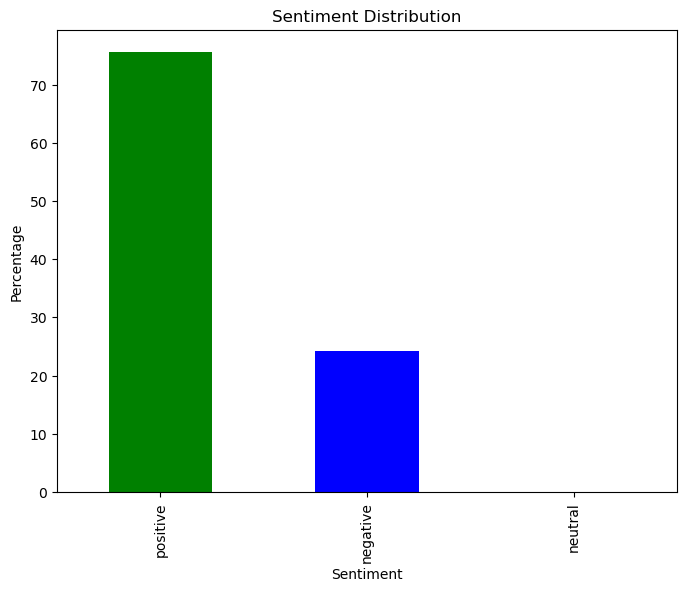

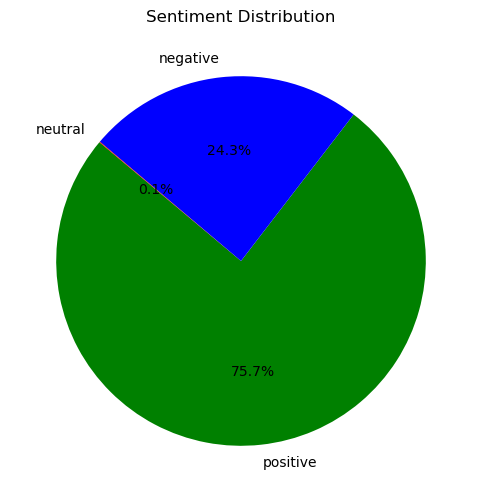

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_distribution = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution)

# Bar plot for sentiment distribution using matplotlib
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

# Pie chart for sentiment distribution using seaborn
plt.figure(figsize=(8, 6))
sns.set_palette(['green', 'blue', 'red'])
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()